<a href="https://colab.research.google.com/github/maushamkumar/Pandas/blob/main/Important_DataFrame_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# MOst Important Function
* value_counts
* sort_values
* rank
* sort_index
* set_index
* rename_index -> rename
* reset_index
* unique & nunique
* isnull/notnull/hasnans
* dropna
* fillna
* drop_duplicates
* drop
* apply
* isin
* corr
* nlargest -> nsmallest
* insert
* copy

In [2]:
# Value_counts(series and data frame) -> Frequency of every unique item
marks = pd.DataFrame([
    [100, 80, 10],
    [90, 70, 7],
    [120, 100, 14],
    [87, 34, 13],
    [87, 34, 13]

], columns=['iq', 'marks', 'package'])
marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,87,34,13
4,87,34,13


In [3]:
marks.value_counts()

iq   marks  package
87   34     13         2
90   70     7          1
100  80     10         1
120  100    14         1
Name: count, dtype: int64

In [4]:
movies = pd.read_csv('/content/movies (2).csv')
ipl = pd.read_csv('/content/ipl-matches.csv')
diabetes = pd.read_csv('/content/diabetes.csv')
batsman = pd.read_csv('/content/batsman_runs_ipl.csv')


In [5]:
# Find which player has won most potm -> in finals and qualifiers
ipl[ipl['MatchNumber'].str.contains('Final|Qualifier 2|Eliminator|Qualifier 1|Qualifier|Elimination Final|3rd Place Play-Off|Semi Final')]['Player_of_Match'].value_counts()


Player_of_Match
KA Pollard           3
F du Plessis         3
SK Raina             3
A Kumble             2
MK Pandey            2
YK Pathan            2
M Vijay              2
JJ Bumrah            2
AB de Villiers       2
SR Watson            2
HH Pandya            1
Harbhajan Singh      1
A Nehra              1
V Sehwag             1
UT Yadav             1
MS Bisla             1
BJ Hodge             1
MEK Hussey           1
MS Dhoni             1
CH Gayle             1
MM Patel             1
DE Bollinger         1
AC Gilchrist         1
RG Sharma            1
DA Warner            1
MC Henriques         1
JC Buttler           1
RM Patidar           1
DA Miller            1
VR Iyer              1
SP Narine            1
RD Gaikwad           1
TA Boult             1
MP Stoinis           1
KS Williamson        1
RR Pant              1
SA Yadav             1
Rashid Khan          1
AD Russell           1
KH Pandya            1
KV Sharma            1
NM Coulter-Nile      1
Washington Sundar 

In [6]:
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()

Player_of_Match
KA Pollard           3
F du Plessis         3
SK Raina             3
A Kumble             2
MK Pandey            2
YK Pathan            2
M Vijay              2
JJ Bumrah            2
AB de Villiers       2
SR Watson            2
HH Pandya            1
Harbhajan Singh      1
A Nehra              1
V Sehwag             1
UT Yadav             1
MS Bisla             1
BJ Hodge             1
MEK Hussey           1
MS Dhoni             1
CH Gayle             1
MM Patel             1
DE Bollinger         1
AC Gilchrist         1
RG Sharma            1
DA Warner            1
MC Henriques         1
JC Buttler           1
RM Patidar           1
DA Miller            1
VR Iyer              1
SP Narine            1
RD Gaikwad           1
TA Boult             1
MP Stoinis           1
KS Williamson        1
RR Pant              1
SA Yadav             1
Rashid Khan          1
AD Russell           1
KH Pandya            1
KV Sharma            1
NM Coulter-Nile      1
Washington Sundar 

In [7]:
ipl['MatchNumber'].unique()

array(['Final', 'Qualifier 2', 'Eliminator', 'Qualifier 1', '70', '69',
       '68', '67', '66', '65', '64', '63', '62', '61', '60', '59', '58',
       '57', '56', '55', '54', '53', '52', '51', '50', '49', '48', '47',
       '46', '45', '44', '43', '42', '41', '40', '39', '38', '37', '36',
       '35', '34', '33', '32', '31', '30', '29', '28', '27', '26', '25',
       '24', '23', '22', '21', '20', '19', '18', '17', '16', '15', '14',
       '13', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2',
       '1', 'Qualifier', 'Elimination Final', '72', '71',
       '3rd Place Play-Off', 'Semi Final'], dtype=object)

<Axes: ylabel='count'>

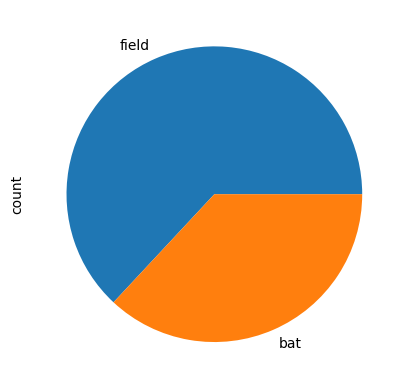

In [8]:
# Toss decision plot
ipl.head()
ipl['TossDecision'].value_counts().plot(kind='pie')

In [9]:
# How many matches each team has played
ipl['Team1'].value_counts()

Team1
Royal Challengers Bangalore    126
Mumbai Indians                 112
Chennai Super Kings            111
Kolkata Knight Riders          105
Kings XI Punjab                 92
Rajasthan Royals                89
Delhi Daredevils                85
Sunrisers Hyderabad             69
Deccan Chargers                 39
Delhi Capitals                  29
Pune Warriors                   23
Punjab Kings                    18
Gujarat Lions                   16
Lucknow Super Giants             8
Gujarat Titans                   7
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [10]:
ipl['Team2'].value_counts()

Team2
Mumbai Indians                 119
Kolkata Knight Riders          118
Rajasthan Royals               103
Royal Challengers Bangalore    100
Kings XI Punjab                 98
Chennai Super Kings             97
Sunrisers Hyderabad             83
Delhi Daredevils                76
Deccan Chargers                 36
Delhi Capitals                  34
Pune Warriors                   23
Gujarat Lions                   14
Punjab Kings                    10
Gujarat Titans                   9
Rising Pune Supergiant           9
Rising Pune Supergiants          7
Lucknow Super Giants             7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [11]:
(ipl['Team1'].value_counts() + ipl['Team2'].value_counts()).sort_values(ascending=False)

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

In [12]:
# Sort_values(series and dataframe) -> ascending -> na_position -> inplace -> multiple columns
x = pd.Series([12, 14, 1, 3, 5,35])
x.sort_values()

2     1
3     3
4     5
0    12
1    14
5    35
dtype: int64

In [13]:
students = pd.DataFrame({
    'name' : ['Mausham', 'Rani', np.nan, 'Rishu', np.nan, 'Gopal', np.nan ,'Nandal', np.nan],
    'college': ['bit', 'iit', np.nan, np.nan, 'visi', 'ssit', np.nan, np.nan, 'nit'],
    'branch': ['CSE', 'it', np.nan, 'ME', 'CE', 'CIV', 'CSE', 'BIO', np.nan],
    'cgpa': [6.66, 8.25, np.nan, 5.6, 9.0, 0.7, 10, 9.4, np.nan],
    'rollno': [1, 2, np.nan, 4, 5, 6, 7, np.nan, np.nan]

})

In [14]:
# Sort our movie data on the basis of movie name
movies.sort_values('title_x', ascending=False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN
756,Zokkomon,tt1605790,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zokkomon,Zokkomon,Zokkomon,0,2011,109,Action|Adventure,4.0,274,After the passing of his parents in an acciden...,An orphan is abused and abandoned believed to...,Betrayal. Friendship. Bravery.,Darsheel Safary|Anupam Kher|Manjari Fadnnis|Ti...,NaN,22 April 2011 (India)
670,Zindagi Tere Naam,tt2164702,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Tere_Naam,Zindagi Tere Naam,Zindagi Tere Naam,0,2012,120,Romance,4.7,27,Mr. Singh an elderly gentleman relates to hi...,Mr. Singh an elderly gentleman relates to hi...,NaN,Mithun Chakraborty|Ranjeeta Kaur|Priyanka Meht...,1 win,16 March 2012 (India)
778,Zindagi Na Milegi Dobara,tt1562872,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Na_Mileg...,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826,Three friends decide to turn their fantasy vac...,Three friends decide to turn their fantasy vac...,NaN,Hrithik Roshan|Farhan Akhtar|Abhay Deol|Katrin...,30 wins & 22 nominations,15 July 2011 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1971 (2007 film),tt0983990,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1971_(2007_film),1971,1971,0,2007,160,Action|Drama|War,7.9,1121,Based on true facts the film revolves around ...,Based on true facts the film revolves around ...,Honor the heroes.......,Manoj Bajpayee|Ravi Kishan|Deepak Dobriyal|,1 win,9 March 2007 (India)
723,1920: The Evil Returns,tt2222550,https://upload.wikimedia.org/wikipedia/en/e/e7...,https://en.wikipedia.org/wiki/1920:_The_Evil_R...,1920: Evil Returns,1920: Evil Returns,0,2012,124,Drama|Horror|Romance,4.8,1587,This story revolves around a famous poet who m...,This story revolves around a famous poet who m...,Possession is back,Vicky Ahuja|Tia Bajpai|Irma Jämhammar|Sharad K...,NaN,2 November 2012 (India)
287,1920: London,tt5638500,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_London,1920 London,1920 London,0,2016,120,Horror|Mystery,4.1,1373,Shivangi (Meera Chopra) lives in London with h...,After her husband is possessed by an evil spir...,Fear strikes again,Sharman Joshi|Meera Chopra|Vishal Karwal|Suren...,NaN,6 May 2016 (USA)
1021,1920 (film),tt1301698,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_(film),1920,1920,0,2008,138,Horror|Mystery|Romance,6.4,2588,A devotee of Bhagwan Shri Hanuman Arjun Singh...,After forsaking his family and religion a hus...,A Love Made in Heaven...A Revenge Born in Hell...,Rajniesh Duggall|Adah Sharma|Anjori Alagh|Raj ...,NaN,12 September 2008 (India)


In [15]:
students.sort_values('name')

,name,college,branch,cgpa,rollno
5,Gopal,ssit,CIV,0.70,6.0
0,Mausham,bit,CSE,6.66,1.0
7,Nandal,NaN,BIO,9.40,NaN
1,Rani,iit,it,8.25,2.0
3,Rishu,NaN,ME,5.60,4.0
2,NaN,NaN,NaN,NaN,NaN
4,NaN,visi,CE,9.00,5.0
6,NaN,NaN,CSE,10.00,7.0
8,NaN,nit,NaN,NaN,NaN


In [16]:
students.sort_values(['cgpa', 'rollno'], ascending=[False, True], inplace=True)
students

,name,college,branch,cgpa,rollno
6,NaN,NaN,CSE,10.00,7.0
7,Nandal,NaN,BIO,9.40,NaN
4,NaN,visi,CE,9.00,5.0
1,Rani,iit,it,8.25,2.0
0,Mausham,bit,CSE,6.66,1.0
3,Rishu,NaN,ME,5.60,4.0
5,Gopal,ssit,CIV,0.70,6.0
2,NaN,NaN,NaN,NaN,NaN
8,NaN,nit,NaN,NaN,NaN


In [17]:
movies.sort_values(['year_of_release', 'title_x'])
movies

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)


In [18]:
movies.sort_values(['year_of_release', 'title_x'], ascending=[True, False])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1622,Yeh Teraa Ghar Yeh Meraa Ghar,tt0298606,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Teraa_Ghar_Y...,Yeh Teraa Ghar Yeh Meraa Ghar,Yeh Teraa Ghar Yeh Meraa Ghar,0,2001,175,Comedy|Drama,5.7,704,In debt; Dayashankar Pandey is forced to go to...,In debt; Dayashankar Pandey is forced to go to...,NaN,Sunil Shetty|Mahima Chaudhry|Paresh Rawal|Saur...,1 nomination,12 October 2001 (India)
1620,Yeh Raaste Hain Pyaar Ke,tt0292740,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Raaste_Hain_...,Yeh Raaste Hain Pyaar Ke,Yeh Raaste Hain Pyaar Ke,0,2001,149,Drama|Romance,4.0,607,Two con artistes and car thieves Vicky (Ajay ...,Two con artistes and car thieves Vicky (Ajay ...,Love is a journey... not a destination,Ajay Devgn|Madhuri Dixit|Preity Zinta|Vikram G...,NaN,10 August 2001 (India)
1573,Yaadein (2001 film),tt0248617,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaadein_(2001_film),Yaadein...,Yaadein...,0,2001,171,Drama|Musical|Romance,4.4,3034,Raj Singh Puri is best friends with L.K. Malho...,Raj Singh Puri is best friends with L.K. Malho...,memories to cherish...,Jackie Shroff|Hrithik Roshan|Kareena Kapoor|Am...,1 nomination,27 June 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,Article 15 (film),tt10324144,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Article_15_(film),Article 15,Article 15,0,2019,130,Crime|Drama,8.3,13417,In the rural heartlands of India an upright p...,In the rural heartlands of India an upright p...,Farq Bahut Kar Liya| Ab Farq Laayenge.,Ayushmann Khurrana|Nassar|Manoj Pahwa|Kumud Mi...,1 win,28 June 2019 (USA)
46,Arjun Patiala,tt7881524,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Arjun_Patiala,Arjun Patiala,Arjun Patiala,0,2019,107,Action|Comedy,4.1,676,Arjun Patiala(Diljit Dosanjh)has recently been...,This spoof comedy narrates the story of a cop ...,NaN,Diljit Dosanjh|Kriti Sanon|Varun Sharma|Ronit ...,NaN,26 July 2019 (USA)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)
26,Albert Pinto Ko Gussa Kyun Aata Hai?,tt4355838,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Albert_Pinto_Ko_...,Albert Pinto Ko Gussa Kyun Aata Hai?,Albert Pinto Ko Gussa Kyun Aata Hai?,0,2019,100,Drama,4.8,56,Albert leaves his house one morning without te...,Albert Pinto goes missing one day and his girl...,NaN,Manav Kaul|Nandita Das|,NaN,12 April 2019 (India)


In [19]:
# rank(series) -> this generate rank based on one column
# For every batsman we have to assign a rank on the basis of runs
batsman.sample(5)
batsman['batting_rank'] = batsman['batsman_run'].rank(ascending=False)
batsman.head()
batsman.sort_values('batting_rank')

,batter,batsman_run,batting_rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
...,...,...,...
512,SS Cottrell,0,594.0
466,S Kaushik,0,594.0
203,IC Pandey,0,594.0
467,S Ladda,0,594.0


In [20]:
# sort_index(series and DataFrame)
marks = {
    'math': 67,
    'english': 57,
    'science': 87,
    'hindi': 77
}
marks = pd.Series(marks)
marks


math       67
english    57
science    87
hindi      77
dtype: int64

In [21]:
marks.sort_index()

english    57
hindi      77
math       67
science    87
dtype: int64

In [22]:
movies.sort_index(ascending=False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1628,Humsafar,tt2403201,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Humsafar,Humsafar,Humsafar,0,2011,35,Drama|Romance,9.0,2968,Sara and Ashar are childhood friends who share...,Ashar and Khirad are forced to get married due...,NaN,Fawad Khan|,NaN,TV Series (2011–2012)
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [23]:
# set_index(dataframe) -> inplace => we'll use batter column as index
batsman
batsman.set_index('batter', inplace=True)

In [24]:
# reset_index(series, dataframe) -> drop parameter => opposite of set_index
batsman.reset_index()

,batter,batsman_run,batting_rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0
2,A Chandila,4,535.0
3,A Chopra,53,329.0
4,A Choudhary,25,402.5
...,...,...,...
600,Yash Dayal,0,594.0
601,Yashpal Singh,47,343.0
602,Younis Khan,3,547.5
603,Yuvraj Singh,2754,27.0


In [25]:
# How to replace existing index without loosing
batsman.reset_index().set_index('batting_rank')
batsman

,batsman_run,batting_rank
batter,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


In [26]:
# series to dataframe using reset index
# when we apply reset_index on series it will become dataframe
marks.reset_index()

,index,0
0,math,67
1,english,57
2,science,87
3,hindi,77


In [27]:
# rename(dataframe) -> index => you can change your column and as well as index name
batsman.rename(columns={'batter': 'batsman'})
batsman.rename(index={'A Ashish Reddy': 'Ashish Reddy'})

,batsman_run,batting_rank
batter,,
Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


In [28]:
# unique(series) -> unique value of a particular column
students['branch'].unique()

array(['CSE', 'BIO', 'CE', 'it', 'ME', 'CIV', nan], dtype=object)

In [29]:
# nunique(series, dataframe) -> does not count nan -> dropna parameter
ipl['Season'].nunique()

15

In [30]:
# isnull(series, dataframe) -> check null values
ipl['Season'].isnull()
students['branch'].isnull()

6    False
7    False
4    False
1    False
0    False
3    False
5    False
2     True
8     True
Name: branch, dtype: bool

In [31]:
# notnull(series, dataframe) -> opposite of isnull
ipl['Season'].notnull()


0      True
1      True
2      True
3      True
4      True
       ... 
945    True
946    True
947    True
948    True
949    True
Name: Season, Length: 950, dtype: bool

In [32]:
students['branch'].notnull()

6     True
7     True
4     True
1     True
0     True
3     True
5     True
2    False
8    False
Name: branch, dtype: bool

In [33]:
# notnull(series, dataframe) -> opposite of isnull
ipl['Season'].notnull()

0      True
1      True
2      True
3      True
4      True
       ... 
945    True
946    True
947    True
948    True
949    True
Name: Season, Length: 950, dtype: bool

In [34]:
# hasnans(series) -> check if the data frame has nan values
students['branch'].hasnans

True

In [35]:
students.isnull()

,name,college,branch,cgpa,rollno
6,True,True,False,False,False
7,False,True,False,False,True
4,True,False,False,False,False
1,False,False,False,False,False
0,False,False,False,False,False
3,False,True,False,False,False
5,False,False,False,False,False
2,True,True,True,True,True
8,True,False,True,True,True


In [36]:
students.notnull(

)

,name,college,branch,cgpa,rollno
6,False,False,True,True,True
7,True,False,True,True,False
4,False,True,True,True,True
1,True,True,True,True,True
0,True,True,True,True,True
3,True,False,True,True,True
5,True,True,True,True,True
2,False,False,False,False,False
8,False,True,False,False,False


In [37]:
# dropna(dataframe, axis) -> axis = 0 => rows -> if you have any missing value in a particular row it'll remove the row
# axis = 1 => columns
students['name'].dropna()

7     Nandal
1       Rani
0    Mausham
3      Rishu
5      Gopal
Name: name, dtype: object

In [38]:
students.dropna()

,name,college,branch,cgpa,rollno
1,Rani,iit,it,8.25,2.0
0,Mausham,bit,CSE,6.66,1.0
5,Gopal,ssit,CIV,0.70,6.0


In [39]:
# We just want to remove those rows where every column have missing value
students.dropna(how='all')

,name,college,branch,cgpa,rollno
6,NaN,NaN,CSE,10.00,7.0
7,Nandal,NaN,BIO,9.40,NaN
4,NaN,visi,CE,9.00,5.0
1,Rani,iit,it,8.25,2.0
0,Mausham,bit,CSE,6.66,1.0
3,Rishu,NaN,ME,5.60,4.0
5,Gopal,ssit,CIV,0.70,6.0
8,NaN,nit,NaN,NaN,NaN


In [40]:
# we want to remove those row where name have missing values
students.dropna(subset=['name'])

,name,college,branch,cgpa,rollno
7,Nandal,NaN,BIO,9.40,NaN
1,Rani,iit,it,8.25,2.0
0,Mausham,bit,CSE,6.66,1.0
3,Rishu,NaN,ME,5.60,4.0
5,Gopal,ssit,CIV,0.70,6.0


In [41]:
# remove those row where college and rollno have missing values
students.dropna(subset=['college', 'rollno'])

,name,college,branch,cgpa,rollno
4,NaN,visi,CE,9.00,5.0
1,Rani,iit,it,8.25,2.0
0,Mausham,bit,CSE,6.66,1.0
5,Gopal,ssit,CIV,0.70,6.0


In [42]:
# fillna(series + dataframe) -> fill nan values
students['branch'].fillna('CSE')

6    CSE
7    BIO
4     CE
1     it
0    CSE
3     ME
5    CIV
2    CSE
8    CSE
Name: branch, dtype: object

In [43]:
students.fillna('kuch nahi')

,name,college,branch,cgpa,rollno
6,kuch nahi,kuch nahi,CSE,10.0,7.0
7,Nandal,kuch nahi,BIO,9.4,kuch nahi
4,kuch nahi,visi,CE,9.0,5.0
1,Rani,iit,it,8.25,2.0
0,Mausham,bit,CSE,6.66,1.0
3,Rishu,kuch nahi,ME,5.6,4.0
5,Gopal,ssit,CIV,0.7,6.0
2,kuch nahi,kuch nahi,kuch nahi,kuch nahi,kuch nahi
8,kuch nahi,nit,kuch nahi,kuch nahi,kuch nahi


In [44]:
students['cgpa'].fillna(students['cgpa'].mean())

6    10.000000
7     9.400000
4     9.000000
1     8.250000
0     6.660000
3     5.600000
5     0.700000
2     7.087143
8     7.087143
Name: cgpa, dtype: float64

In [45]:
# drop_duplicates(series, dataframe) -> drop duplicate values
students.drop_duplicates()

,name,college,branch,cgpa,rollno
6,NaN,NaN,CSE,10.00,7.0
7,Nandal,NaN,BIO,9.40,NaN
4,NaN,visi,CE,9.00,5.0
1,Rani,iit,it,8.25,2.0
0,Mausham,bit,CSE,6.66,1.0
3,Rishu,NaN,ME,5.60,4.0
5,Gopal,ssit,CIV,0.70,6.0
2,NaN,NaN,NaN,NaN,NaN
8,NaN,nit,NaN,NaN,NaN


In [46]:
marks.drop_duplicates().sum()

288

In [47]:
# Find the last match played by Virat Kohli in Delhi
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [49]:
ipl['all_players'] = ipl['Team1Players'] + ipl['Team2Players']
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."


In [50]:
def did_kohli_play(players_list):
  return 'V Kohli' in players_list

In [51]:
did_kohli_play(['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ Maxwell'])

True

In [53]:
ipl['did_kohli_play'] =  ipl['all_players'].apply(did_kohli_play)

In [58]:
ipl[(ipl['did_kohli_play'] == True) & (ipl['City'] == 'Delhi')].drop_duplicates(subset=['City', 'did_kohli_play'], keep='first')

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players,did_kohli_play
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",True


In [60]:
# drop(series + dataframe )
temp = pd.Series([10, 3, 5,36, 36, 6, 43, 2,4 ])
temp

0    10
1     3
2     5
3    36
4    36
5     6
6    43
7     2
8     4
dtype: int64

In [61]:
temp.drop(index=[0, 2, 3]) # Passs the index value

1     3
4    36
5     6
6    43
7     2
8     4
dtype: int64

In [62]:
students

,name,college,branch,cgpa,rollno
6,NaN,NaN,CSE,10.00,7.0
7,Nandal,NaN,BIO,9.40,NaN
4,NaN,visi,CE,9.00,5.0
1,Rani,iit,it,8.25,2.0
0,Mausham,bit,CSE,6.66,1.0
3,Rishu,NaN,ME,5.60,4.0
5,Gopal,ssit,CIV,0.70,6.0
2,NaN,NaN,NaN,NaN,NaN
8,NaN,nit,NaN,NaN,NaN


In [63]:
students.drop(columns=['cgpa', 'rollno']) # Pass the column name

,name,college,branch
6,NaN,NaN,CSE
7,Nandal,NaN,BIO
4,NaN,visi,CE
1,Rani,iit,it
0,Mausham,bit,CSE
3,Rishu,NaN,ME
5,Gopal,ssit,CIV
2,NaN,NaN,NaN
8,NaN,nit,NaN


In [65]:
students.drop(index=[0, 3])

,name,college,branch,cgpa,rollno
6,NaN,NaN,CSE,10.00,7.0
7,Nandal,NaN,BIO,9.40,NaN
4,NaN,visi,CE,9.00,5.0
1,Rani,iit,it,8.25,2.0
5,Gopal,ssit,CIV,0.70,6.0
2,NaN,NaN,NaN,NaN,NaN
8,NaN,nit,NaN,NaN,NaN


In [66]:
students.set_index('name').drop(index=['Mausham', 'Rishu'])

,college,branch,cgpa,rollno
name,,,,
NaN,NaN,CSE,10.00,7.0
Nandal,NaN,BIO,9.40,NaN
NaN,visi,CE,9.00,5.0
Rani,iit,it,8.25,2.0
Gopal,ssit,CIV,0.70,6.0
NaN,NaN,NaN,NaN,NaN
NaN,nit,NaN,NaN,NaN


In [79]:
# apply(series + dataframe)
point_df = pd.DataFrame(
    {
        '1st point' : [(3, 4), (-6,5), (0, 0), (-10, 1), (4, 5)],
        '2nd point' : [(-3, 4), (0, 0), (2, 2), (10, 10), (1, 1)]
    }
)
point_df

,1st point,2nd point
0,"(3, 4)","(-3, 4)"
1,"(-6, 5)","(0, 0)"
2,"(0, 0)","(2, 2)"
3,"(-10, 1)","(10, 10)"
4,"(4, 5)","(1, 1)"


In [69]:
def sigmoid(value):
  return 1 / (1 + np.exp(-value))

In [70]:
temp.apply(sigmoid) # How apply works on a series object

0    0.999955
1    0.952574
2    0.993307
3    1.000000
4    1.000000
5    0.997527
6    1.000000
7    0.880797
8    0.982014
dtype: float64

In [71]:
# find the euclidean distance between two points

In [84]:
def distance(row):
  pt_a = row['1st point']
  pt_b = row['2nd point']

  return ((pt_a[0] - pt_b[0])**2 + (pt_a[1] - pt_b[1])**2)**0.5

In [85]:
point_df['distance'] = point_df.apply(distance, axis=1)
point_df

,1st point,2nd point,distance
0,"(3, 4)","(-3, 4)",6.000000
1,"(-6, 5)","(0, 0)",7.810250
2,"(0, 0)","(2, 2)",2.828427
3,"(-10, 1)","(10, 10)",21.931712
4,"(4, 5)","(1, 1)",5.000000
